In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, colorConverter
import seaborn as sns

from sklearn import datasets
from sklearn.datasets import make_blobs, load_iris, make_moons, fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC, SVC, LinearSVR, OneClassSVM

In [2]:
semilla = 675

In [3]:
datos = fetch_20newsgroups()
print(datos.target_names)
# Las clases que tiene el target
categorias = ['talk.religion.misc', 'soc.religion.christian','sci.space','comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categorias)
test = fetch_20newsgroups(subset='test', categories=categorias)
print(train.data[5])

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919

In [4]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

###  EJEMPLO 7: Usar un modelo Naive Bayes Gausiano con el dataset iris.

In [5]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=semilla)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Hay %d ejemplos mal clasificados de %d" % ((y_test != y_pred).sum(), X_test.shape[0]) )

Hay 0 ejemplos mal clasificados de 75


### EJEMPLO 8: Vamos a clasificar correos en spam o no fijándonos en las palabras que contienen.
Tenemos un total de 12 correos, 8 de ellos son normales y 4 son spam. Entrenamos un modelo Naive
Bayes Multinomial y necesitamos contear las apariciones de cada palabra significativa que aparezca
en cualquiera de los correos.

 En cuanto a los correos normales tenemos:

 • 8 correos normales.

 • Palabra "Dear" aparece 8: 8/17 = 0.47

• Palabra "Friend" aparece 5: 5/17 = 0.29

 • Palabra "Lunch" aparece 3: 3/17 = 0.17

 • La palabra "Money" aparece 1: 1/17 = 0.058

 En cuanto a los spam:

 • 4 correos spam.

 • Palabra "Dear" aparece 2: 2/7 = 0.29

 • Palabra "Friend" aparece 1: 1/7 = 0.14

 • Palabra "Lunch" aparece 0: 0/7 = 0

 • La palabra "Money" aparece 4: 4/7 = 0.57

### EJEMPLO 9: Usamos contadores de palabras de 20 noticias de un foro para ver como clasifica

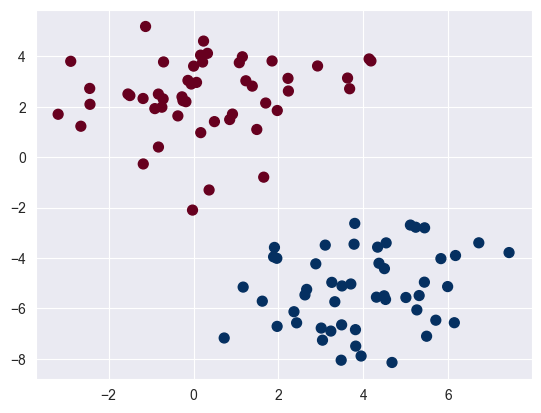

In [6]:
X, y = make_blobs(100, 2, centers=2,random_state=semilla,
cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50,cmap='RdBu');

(np.float64(-3.7210824010284265),
 np.float64(7.96638877416713),
 np.float64(-8.80893692357105),
 np.float64(5.852118818719206))

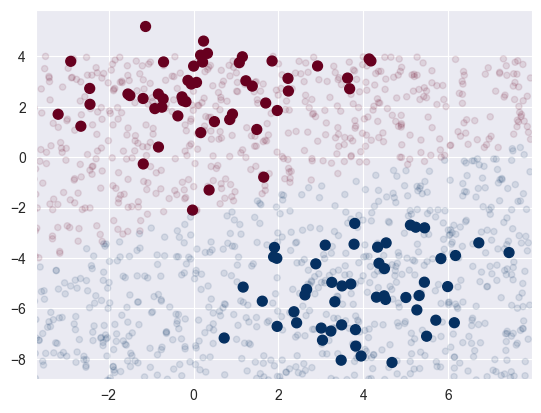

In [7]:
modelo = GaussianNB()
modelo.fit(X, y);
# Ahora generamos nuevos datos y predecimos su etiqueta
rng = np.random.RandomState(0)
nuevo_X = [-6, -14] + [14, 18] * rng.rand(2000, 2)
nuevo_y = modelo.predict(nuevo_X)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
limite = plt.axis()
plt.scatter(nuevo_X[:, 0], nuevo_X[:, 1], c=nuevo_y, s=20, cmap='RdBu', alpha=0.1)
plt.axis(limite)

In [8]:
y_proba = modelo.predict_proba(nuevo_X)
print(y_proba[-8:].round(2)) # salida: [[ 0.89, 0.11], [1. , 0.], … [0.15, 0.85]]

[[0.88 0.12]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]]


In [9]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=semilla)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Hay %d ejemplos mal clasificados de %d" % ((y_test != y_pred).sum(), X_test.shape[0]) )

Hay 0 ejemplos mal clasificados de 75


In [10]:
datos = fetch_20newsgroups()
print(datos.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [11]:
categorias = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categorias)
test = fetch_20newsgroups(subset='test', categories=categorias)

In [12]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [13]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [14]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(113.9222222222222, 0.5, 'Label predicha')

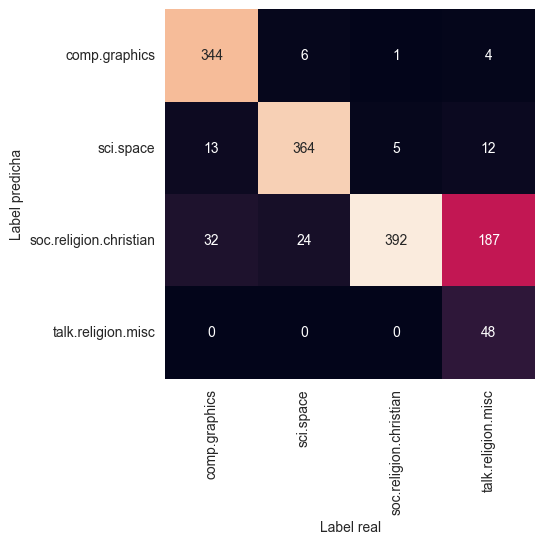

In [15]:
mc = confusion_matrix(test.target, labels)
sns.heatmap(mc.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('Label real')
plt.ylabel('Label predicha')

In [16]:
def predice_categoria(texto, train=train, model=modelo):
    pred = model.predict([texto])
    return train.target_names[pred[0]]

In [17]:
# Pruebas
#print(predice_categoria('sending a payload to the ISS'))      # 'sci.space'
#print(predice_categoria('discussing islam vs atheism'))      # 'soc.religion.christian'
#print(predice_categoria('determining the screen resolution')) # 'comp.graphics'

 ### EJEMPLO 10: Crear y entrenar un modelo LinearSVC.


In [18]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # longitud y anchura de pétalos
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X, y)

print(svm_clf.predict([[5.5, 1.7]]))

[1.]


### EJEMPLO 11: Creamos el fichero u03_util.py donde implementamos varias funciones de dibujo

In [19]:
cm2 = ListedColormap(['#0000aa', '#ff2020'])

In [20]:
def discrete_scatter(x1, x2, y=None, markers=None, s=10, ax=None, labels=None, padding=.2, alpha=1, c=None, markeredgewidth=None):
    if ax is None:
        ax = plt.gca()
    if y is None:
        y = np.zeros(len(x1))
    if markers is None:
        markers = ['o', '^', 'v', 'D', 's', '*', 'p', 'h', 'H', '8', '<', '>'] * 10
    if len(markers) == 1:
        markers = markers * len(np.unique(y))
    if labels is None:
        labels = np.unique(y)
    lineas = []
    for i, (yy, cycle) in enumerate(zip(np.unique(y), mpl.rcParams['axes.prop_cycle']())):
        mask = y == yy
        if c is None:
            color = cycle['color']
        elif len(c) > 1:
            color = c[i]
        else:
            color = c
        # si c es none, usa colores repetidos
        if np.mean(colorConverter.to_rgb(color)) < .4:  # frontera clara si marker oscuro
            markeredgecolor = "grey"
        else:
            markeredgecolor = "black"
        lineas.append(ax.plot(x1[mask], x2[mask], markers[i], markersize=s, label=labels[i], alpha=alpha, c=color,markeredgewidth=markeredgewidth, markeredgecolor=markeredgecolor)[0])
    if padding != 0:
        pad1 = x1.std() * padding
        pad2 = x2.std() * padding
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.set_xlim(min(x1.min() - pad1, xlim[0]), max(x1.max() + pad1, xlim[1]))
        ax.set_ylim(min(x2.min() - pad2, ylim[0]), max(x2.max() + pad2, ylim[1]))
    return lineas

In [21]:
def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None, alpha=1,
                      cm=cm2, linewidth=None, threshold=None, linestyle="solid"):
    if eps is None:
        eps = X.std() / 2.
    if ax is None:
        ax = plt.gca()
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)
    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0] if threshold is None else [threshold]
        fill_levels = [decision_values.min()] + levels + [decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5] if threshold is None else [threshold]
        fill_levels = [0] + levels + [1]
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, alpha=alpha, cmap=cm)
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black", alpha=alpha, linewidths=linewidth,
                   linestyles=linestyle, zorder=5)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

In [22]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=14)
    plt.ylabel(r"$x_2$", fontsize=14, rotation=0)

In [23]:
def plot_predicciones(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

###  EJEMPLO 12: Generar y dibujar datos linealmente no separables en 2D.


[]

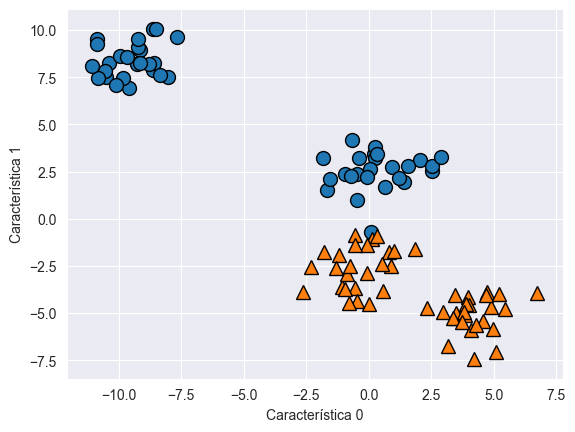

In [24]:
X, y = make_blobs(centers=4, random_state=semilla)
y = y % 2
discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Característica 0")
plt.ylabel("Característica 1")
plt.plot()

### EJEMPLO 13: Crear y entrenar un modelo clasificador SVM para los datos del EJEMPLO 12.

Text(0, 0.5, 'Característica 1')

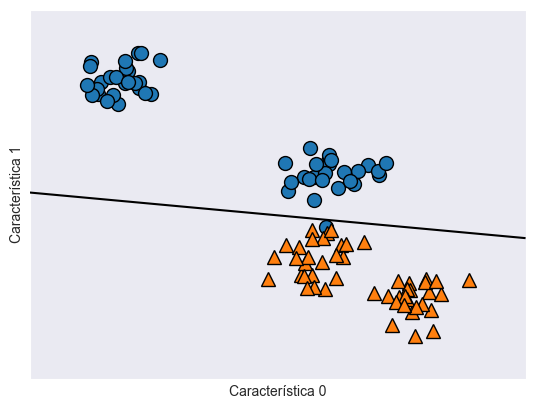

In [25]:
lineal_svm = LinearSVC().fit(X, y)
plot_2d_separator(lineal_svm, X)
discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Característica 0")
plt.ylabel("Característica 1")

### EJEMPLO 14: Crear y entrenar un modelo clasificador SVM para los datos del EJEMPLO 12.

C:\Users\ESP\AppData\Local\Temp\ipykernel_2260\334143281.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mascara, 0], X_new[mascara, 1], X_new[mascara, 2], c='b', cmap= cm2, s=60, edgecolor='k')
C:\Users\ESP\AppData\Local\Temp\ipykernel_2260\334143281.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mascara, 0], X_new[~mascara, 1], X_new[~mascara, 2], c='r', marker='^', cmap=cm2, s=60, edgecolor='k')


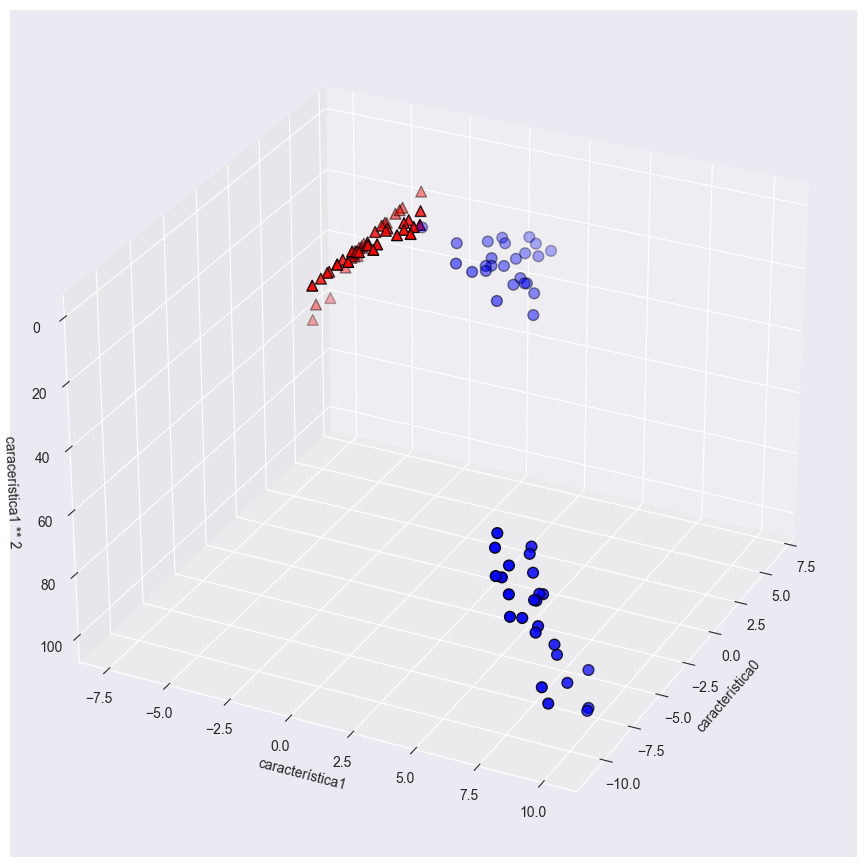

In [26]:
X_new = np.hstack( [X, X[:, 1:] ** 2] )
ax = plt.figure(figsize=(12,11)).add_subplot(projection='3d')
mascara = y == 0
ax.scatter(X_new[mascara, 0], X_new[mascara, 1], X_new[mascara, 2], c='b', cmap= cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mascara, 0], X_new[~mascara, 1], X_new[~mascara, 2], c='r', marker='^', cmap=cm2, s=60, edgecolor='k')
ax.set_xlabel("característica0")
ax.set_ylabel("característica1")
ax.set_zlabel("caracerística1 ** 2")
ax.view_init(elev=-152., azim=-26, roll=0) # plt.show()

 ###  EJEMPLO 15: Dibujar el plano 3D que separa los datos de las dos clases.


C:\Users\ESP\AppData\Local\Temp\ipykernel_2260\765912724.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mascara, 0], X_new[mascara, 1], X_new[mascara, 2], c='b',
C:\Users\ESP\AppData\Local\Temp\ipykernel_2260\765912724.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mascara, 0], X_new[~mascara, 1], X_new[~mascara, 2], c='r',


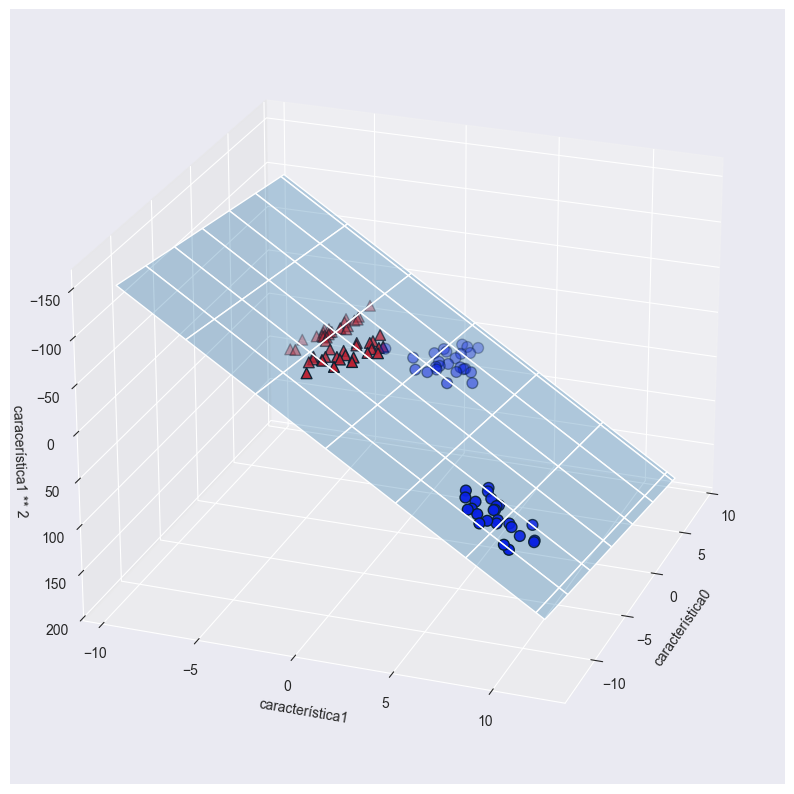

In [27]:
lineal_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = lineal_svm_3d.coef_.ravel(), lineal_svm_3d.intercept_
# Mostrar la frontera de decisión
ax = plt.figure(figsize=(10,11)).add_subplot(projection='3d')
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mascara, 0], X_new[mascara, 1], X_new[mascara, 2], c='b',
       cmap=cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mascara, 0], X_new[~mascara, 1], X_new[~mascara, 2], c='r',
       marker='^', cmap=cm2, s=60, edgecolor='k')
ax.set_xlabel("característica0")
ax.set_ylabel("característica1")
ax.set_zlabel("caracerística1 ** 2")
ax.view_init(elev=-156., azim=-20, roll=0) # plt.show()

### EJEMPLO 16: Dibujar las superficies de decisión en 2D.


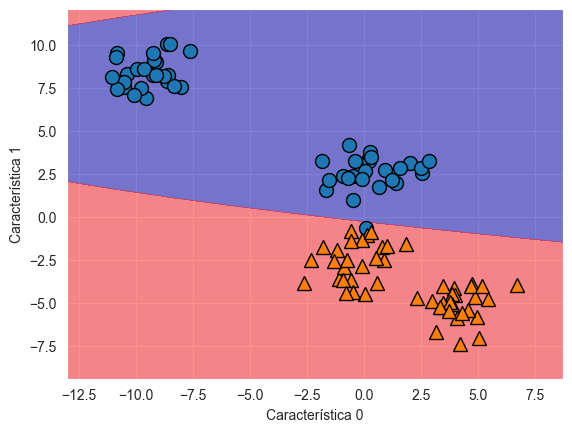

In [28]:
ZZ = YY ** 2
dec = lineal_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap= cm2,
alpha=0.5)
discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Característica 0")
plt.ylabel("Característica 1")
plt.show()

### EJEMPLO 17: Crear una SVC, entrenarla y mostrar su frontera de decisión

In [29]:
def crea_dataset_revuelto():
    X, y = make_blobs(centers=2, random_state=semilla, n_samples=30)
    y[np.array([7, 27])] = 0
    mascara = np.ones(len(X), dtype=bool)
    mascara[np.array([0, 1, 5, 26])] = 0
    X, y = X[mascara], y[mascara]
    return X, y

Text(0, 0.5, 'Característica 1')

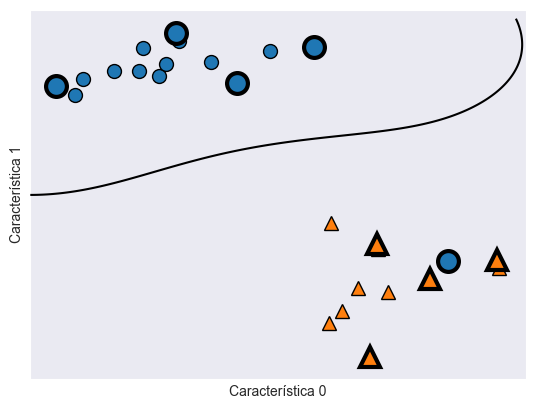

In [30]:
X, y = crea_dataset_revuelto()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
plot_2d_separator(svm, X, eps=.5)
discrete_scatter(X[:, 0], X[:, 1], y)
# Dibujar los vectores soporte
sv = svm.support_vectors_
# La clase de los ectores soporte lo indica el signo de los coeficientes duales
sv_labels = svm.dual_coef_.ravel() > 0
discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Característica 0")
plt.ylabel("Característica 1")

### EJEMPLO 18: Crear una SVC y añadir características polinomiales antes de entrenarla.


C:\Users\ESP\Desktop\MachineLearning\saa\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


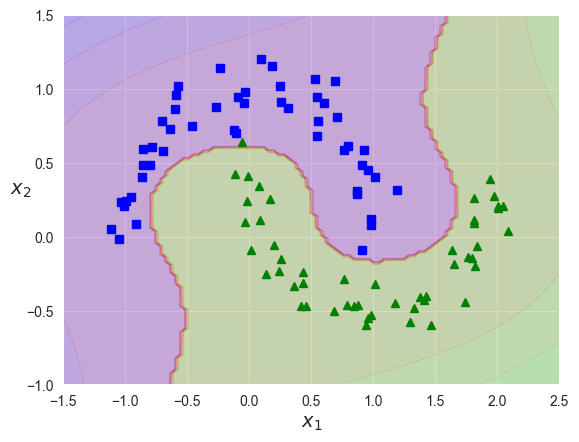

In [31]:
 # -*- coding: utf-8 -*
X, y = make_moons(n_samples=100, noise=0.10, random_state=semilla)
svm_poli = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])
svm_poli.fit(X, y)
plot_predicciones(svm_poli, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

### EJEMPLO 19: Volvemos a usar el dataset moons pero ahora usando un kernel polinomial.


In [32]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=semilla) # Crea dataset
# Definir y entrenar un SVC con kernel polinomial de grado 3, coef0 1 y C=5
kernel_poli = Pipeline([
      ("scaler", StandardScaler()),
      ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
kernel_poli.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [33]:
# Definir y entrenar un SVC con kernel polinomial de grado 10, coef0 100 y C=53
#kernel_poli100 = Pipeline([
#    ("scaler", StandardScaler()),
#    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
#])

#kernel_poli100.fit(X, y)

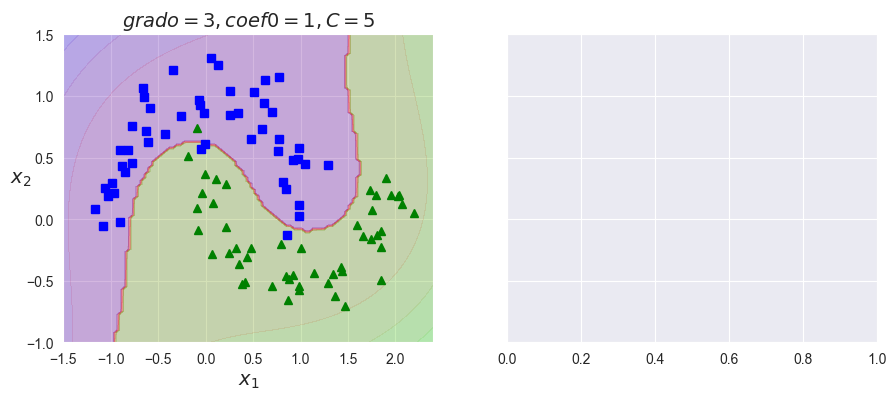

In [35]:
# Dibujar las superficies de clasificación de ambos
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)
plt.sca(axes[0])
plot_predicciones(kernel_poli, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$grado=3, coef0=1, C=5$", fontsize=14)
plt.sca(axes[1])
#plot_predicciones(kernel_poli100, [-1.5, 2.45, -1, 1.5])
#plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
#plt.title(r"$grado=10, coef0=100, C=5$", fontsize=14)
#plt.ylabel("")
#plt.show()

### EJEMPLO 20: Con el dataset moons usamos kernel RBF.

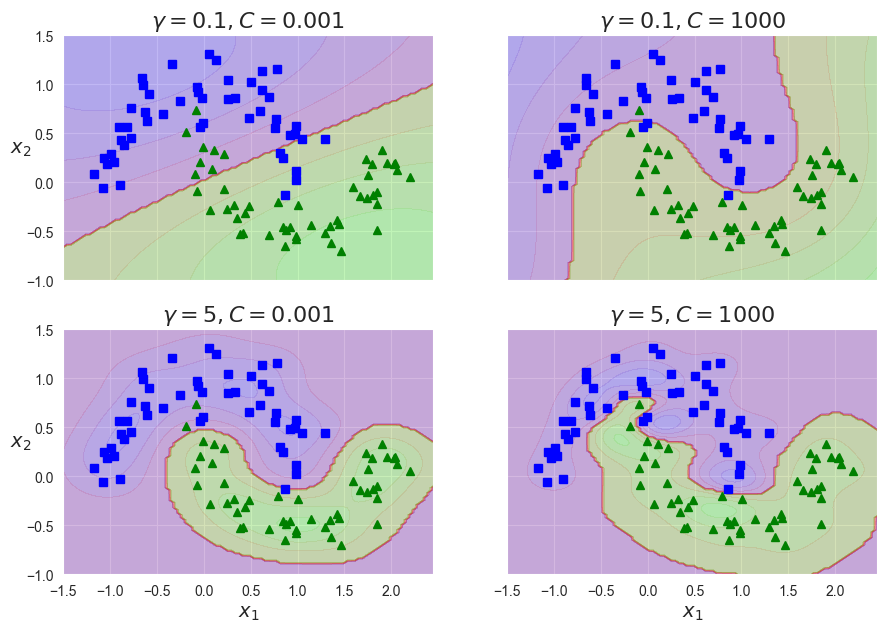

In [36]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=semilla)  # Crea dataset

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hiperparametros = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hiperparametros:
    svm_kernel_rbf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
    ])
    svm_kernel_rbf.fit(X, y)
    svm_clfs.append(svm_kernel_rbf)

fig, ejes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(ejes[i // 2, i % 2])
    plot_predicciones(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hiperparametros[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show() # added to show the plot

 ### EJEMPLO 21: Regresión lineal con SVM.


In [37]:
# Definir los datos de entrenamiento
np.random.seed(semilla)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

# Entrenar los SVM para regresión
svm_reg1 = LinearSVR(epsilon=1.5, random_state=semilla)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=semilla)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

LinearSVR(epsilon=0.5, random_state=675)

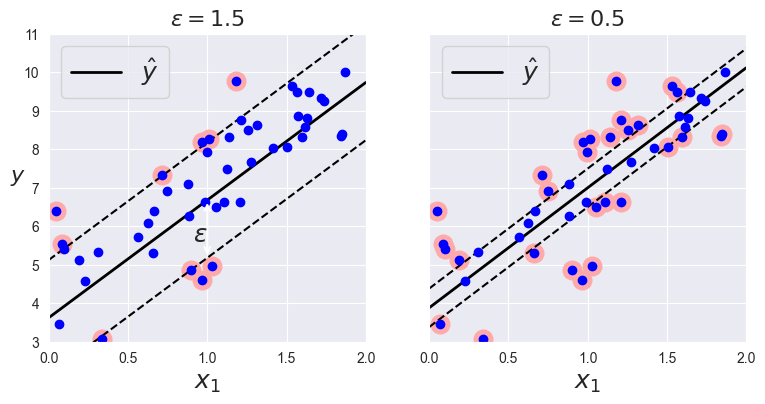

In [38]:
def encontrar_vectores_soporte(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    fuera_de_margen = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(fuera_de_margen)

svm_reg1.support_ = encontrar_vectores_soporte(svm_reg1, X, y)
svm_reg2.support_ = encontrar_vectores_soporte(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

def plot_svm_regresion(svm_reg, X, y, ejes):  # Puedes llevarte esta a U03_tools.py
    x1s = np.linspace(ejes[0], ejes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(ejes)

fig, ejes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

plt.sca(ejes[0])
plot_svm_regresion(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=16)
plt.ylabel(r"$y$", fontsize=16, rotation=0)
plt.annotate('', xy=(eps_x1, eps_y_pred), xycoords='data',
             xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
             textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
            )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=18)

plt.sca(ejes[1])
plot_svm_regresion(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=16)
plt.show()

In [39]:
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

### EJEMPLO 22: Añade estas sentencias detrás de las últimas del EJEMPLO 21.

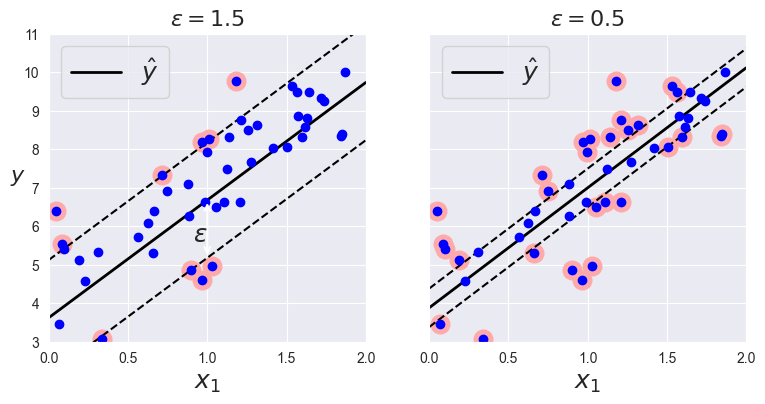

In [40]:
# Definir los datos de entrenamiento
np.random.seed(semilla)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

# Entrenar los SVM para regresión
svm_reg1 = LinearSVR(epsilon=1.5, random_state=semilla)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=semilla)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def encontrar_vectores_soporte(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    fuera_de_margen = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(fuera_de_margen)

svm_reg1.support_ = encontrar_vectores_soporte(svm_reg1, X, y)
svm_reg2.support_ = encontrar_vectores_soporte(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

def plot_svm_regresion(svm_reg, X, y, ejes):  # Puedes llevarte esta a U03_tools.py
    x1s = np.linspace(ejes[0], ejes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(ejes)

fig, ejes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

plt.sca(ejes[0])
plot_svm_regresion(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=16)
plt.ylabel(r"$y$", fontsize=16, rotation=0)
plt.annotate('', xy=(eps_x1, eps_y_pred), xycoords='data',
             xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
             textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
            )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=18)

plt.sca(ejes[1])
plot_svm_regresion(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=16)
plt.show()

###  EJEMPLO 23: Detección de outliers usando One-class SVM.


Formato de los datos de entrenamiento: (500, 2)
Primeros 3 datos:
 [[-10.12250773   7.87351037]
 [ -0.50674418   1.17639658]
 [ -7.65123571   9.46865639]]
Outliers detectados:
 [[ -7.42674674   9.86929947]
 [ -2.08102591   2.48782707]
 [-10.72863896   6.51116884]
 [  2.55810566  -6.90384098]
 [  6.18508359  -3.92366919]
 [  1.81029979  -4.66402556]
 [  4.72157447  -7.56681355]
 [  4.37135195  -8.01402114]
 [  0.08232622  -0.69027267]
 [  5.69719598  -3.0394264 ]
 [ -0.6552696    4.16521033]
 [  6.299693    -5.51893031]
 [ -2.00548026   0.77120487]
 [  2.88494283   3.25394592]
 [  4.09050226  -7.60861802]
 [ -7.72377259  10.30054518]
 [ -1.83082111   3.24433346]
 [ -7.03671902   9.77977207]
 [-11.17543563   6.42087601]
 [  2.85650014   3.3069687 ]
 [  0.10132015  -1.01788533]
 [ -9.21626552  10.76662731]
 [ -9.35925622   6.09854498]
 [  2.79058383   2.84021203]
 [  4.49683612  -2.59047848]
 [-11.54214558   7.16538712]
 [-11.02788944   9.75431815]]


C:\Users\ESP\AppData\Local\Temp\ipykernel_2260\637379952.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


0.05 <= 0.05 <= 0.06?


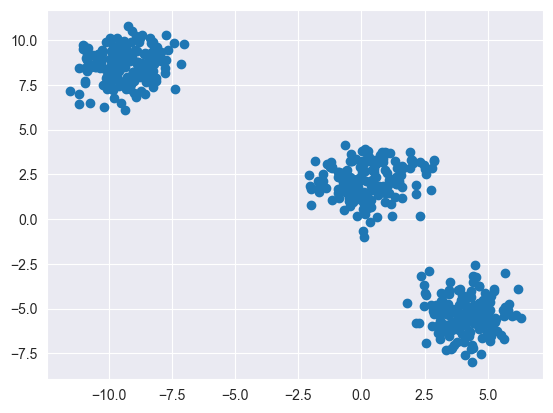

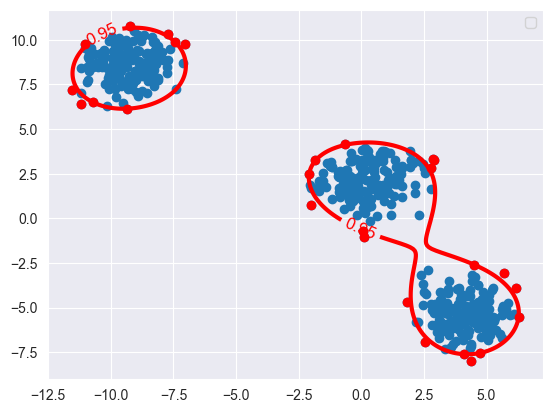

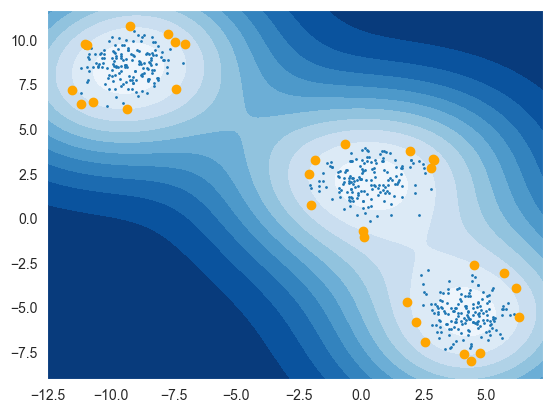

In [41]:
X, y = make_blobs(n_features=2, centers=3, n_samples=500, random_state=semilla)
print("Formato de los datos de entrenamiento:", X.shape)
print("Primeros 3 datos:\n", X[:3,:])
plt.figure()
plt.scatter(X[:, 0], X[:, 1])  # plt.show()

# Detectar outliers
nu = 0.05
# Suponemos que hay un 5% de datos anómalos

svm_oc = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu)
svm_oc.fit(X)
X_outliers = X[svm_oc.predict(X) == -1]
print("Outliers detectados:\n", X_outliers)

# Definir rejilla para marcar la frontera de decisión
n_ejemplos, n_caracteristicas = X.shape
X_range = np.zeros((n_caracteristicas, 2))
X_range[:, 0] = np.min(X, axis=0) - 1.
X_range[:, 1] = np.max(X, axis=0) + 1.
h = 0.1
# Tamaño de paso de la rejilla
x_min, x_max = X_range[0]
y_min, y_max = X_range[1]
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

# Dibujar la frontera y marcar de rojo los outliers
alfa_set = 0.95
Z_ocsvm = svm_oc.decision_function(grid)
Z_ocsvm = Z_ocsvm.reshape(xx.shape)
plt.figure()
c_0 = plt.contour(xx, yy, Z_ocsvm, levels=[0], colors='red', linewidths=3)
plt.clabel(c_0, inline=1, fontsize=12, fmt={0: str(alfa_set)})
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='red')
plt.legend()
# plt.show()

# En el one-class SVM, no todos los vectores soporte son outliers
X_SV = X[svm_oc.support_]
n_SV = len(X_SV)
n_outliers = len(X_outliers)
print('{0:.2f} <= {1:.2f} <= {2:.2f}?'.format(
    1./n_ejemplos * n_outliers, nu, 1./n_ejemplos * n_SV))

# Marcamos los vectores soporte
plt.figure()
plt.contourf(xx, yy, Z_ocsvm, 10, cmap=plt.cm.Blues_r)
plt.scatter(X[:, 0], X[:, 1], s=1.)
plt.scatter(X_SV[:, 0], X_SV[:, 1], color='orange')
plt.show()

###  EJEMPLO 24:  Generar varios clasificadores SVM con diferentes hiperparámetros.

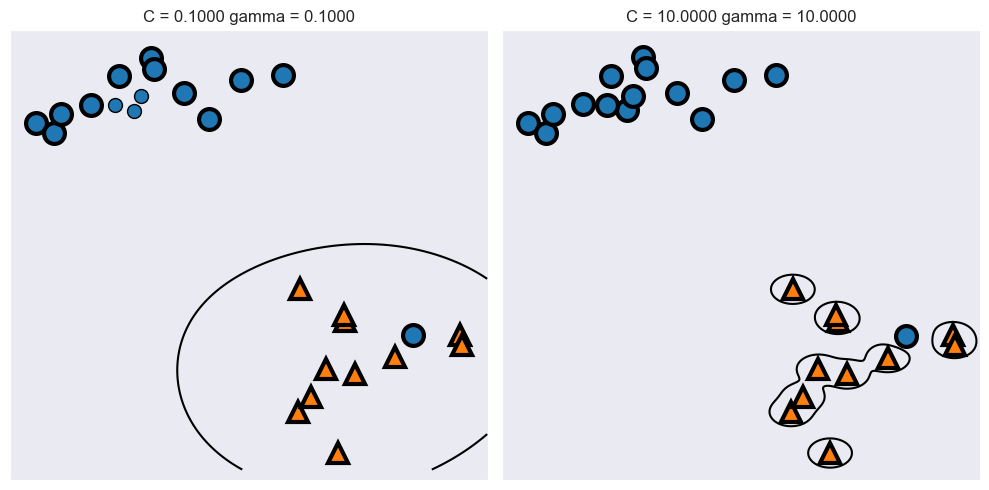

In [42]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np

def plot_svm(log_C, log_gamma, ax=None):
    X, y = crea_dataset_revuelto()
    C = 10. ** log_C
    gamma = 10. ** log_gamma

    svm = SVC(kernel='rbf', C=C, gamma=gamma).fit(X, y)
    if ax is None:
        ax = plt.gca()
    plot_2d_separator(svm, X, ax=ax, eps=.5)
    discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)      # dibujar datos
    sv = svm.support_vectors_                         # dibuja vectores soporte
    sv_labels = svm.dual_coef_.ravel() > 0      # Etiquetas de clases de vectores soporte
    discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3, ax=ax)
    ax.set_title(f"C = {C:.4f} gamma = {gamma:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plot_svm(-1, -1, ax=axes[0])
plot_svm(1, 1, ax=axes[1])
plt.tight_layout()
plt.show()

###  EJEMPLO 25: Cargar datos del dataset, entrenar un modelo SVC y medir su eficiencia.


In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import sklearn.datasets as ds
cancer= ds.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                               random_state=semilla)
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy en train: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy en test: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy en train: 0.92
Accuracy en test: 0.92


### EJEMPLO 26: Añadimos al código del ejemplo 25 el siguiente para ver como son los máximos y mínimos en escala logarítmica (máximos con triángulos y mínimos con cícrculos).

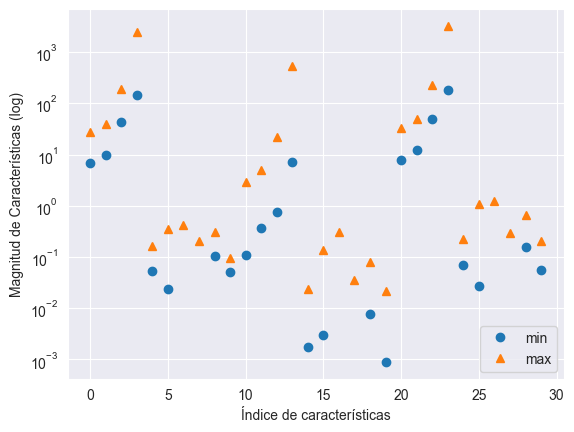

Text(0, 0.5, 'Magnitud de Características (log)')

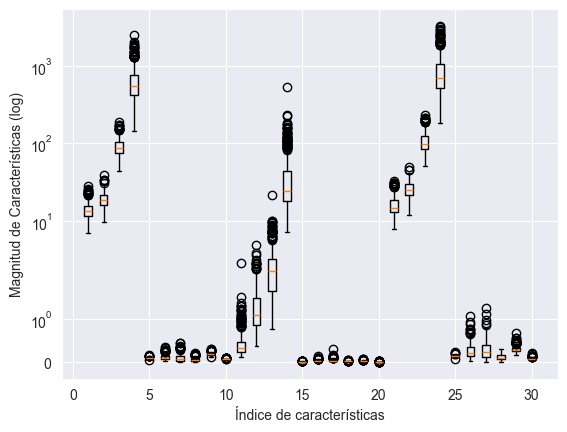

In [44]:
import matplotlib.pyplot as plt
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Índice de características")
plt.ylabel("Magnitud de Características (log)")
plt.yscale("log")
plt.show()
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Índice de características")
plt.ylabel("Magnitud de Características (log)")

 ### EJEMPLO 27: Escalar todos los datos de train. Añade el código al ejemplo 25.


In [45]:
# Calcular el mínimo valor de cada columna
min_train = X_train.min(axis=0)
rango_train = (X_train - min_train).max(axis=0)
X_train_escalado = (X_train - min_train) / rango_train
print("Mínimo de cada característica\n", X_train_escalado.min(axis=0))
print("Máximum de cada característica\n", X_train_escalado.max(axis=0))
X_test_escalado = (X_test - min_train) / rango_train
# Volver e antrenar modelo
svc = SVC()
svc.fit(X_train_escalado, y_train)
# Escala test
print(f"Accuracy de train: {svc.score(X_train_escalado, y_train):.3f}")
print(f"Accuracy de test:  {svc.score(X_test_escalado, y_test):.3f}")

Mínimo de cada característica
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Máximum de cada característica
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Accuracy de train: 0.977
Accuracy de test:  0.993


 ### EJEMPLO 28: Modificar hiperparámetros C o gamma. Añade el código al ejemplo 22 y lo pruebas.

In [46]:
svc = SVC(C=1000)
svc.fit(X_train_escalado, y_train)
print(f"Accuracy de train: {svc.score(X_train_escalado, y_train):.3f}")
print(f"Accuracy de test:  {svc.score(X_test_escalado, y_test):.3f}")

Accuracy de train: 1.000
Accuracy de test:  0.972


### EJEMPLO 31: Entrenar un árbol de decisión, dibujarlo, hacer predicciones y dibujar las fronteras.


Prediccion:  [2]
Probabilidades de: [0 1 2] [[0.         0.02173913 0.97826087]]
Prediccion:  [2]
Probabilidades de: [0 1 2] [[0.         0.02173913 0.97826087]]
Prediccion:  [0]
Probabilidades de: [0 1 2] [[1. 0. 0.]]
Prediccion:  [0]
Probabilidades de: [0 1 2] [[1. 0. 0.]]


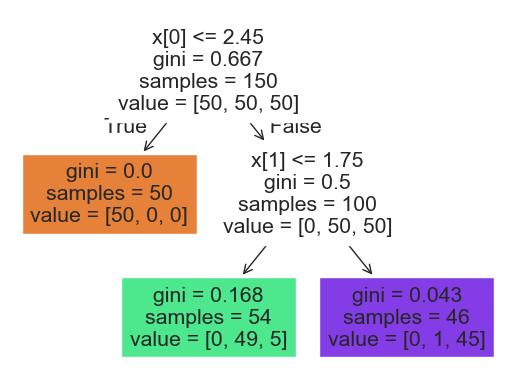

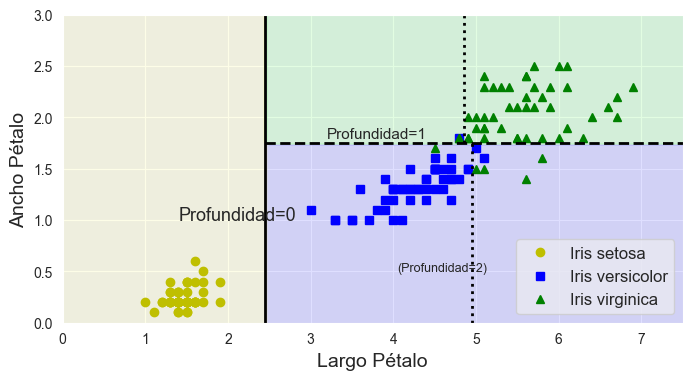

In [52]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Cargar datos
iris = load_iris()
X = iris.data[:, 2:] # longitud y anchura de pátalos
y = iris.target
# Entrenar el modelo
arbol = DecisionTreeClassifier(max_depth=2, random_state=semilla)
arbol.classes_ =  ["Setosa", "Virginica", "Versicolor"]
arbol.fit(X, y)
tree.plot_tree(arbol, filled=True)
# hacer predicciones
while True:
    petalo_largo = float(input("Longitud del pétalo (-1 para salir):"))
    if petalo_largo < 0:
        break
    petalo_ancho = float(input("Anchura del pétalo:"))
    ejemplos = [[petalo_largo, petalo_ancho]]
    print("Prediccion: ", arbol.predict(ejemplos))
    print(f"Probabilidades de: {arbol.classes_}", arbol.predict_proba(ejemplos))
# --------------- AÑADIR ESTE TROZO AL FICHERO U03_tools.py ----------------------
# Dibujar fronteras de decisión
def plot_fronteras_decision(arbol, X, y, ejes=[0, 7.5, 0, 3], iris=True, legend=True,
                            plot_training=True):
    x1s = np.linspace(ejes[0], ejes[1], 100)
    x2s = np.linspace(ejes[2], ejes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_nuevo = np.c_[x1.ravel(), x2.ravel()]

    y_pred = arbol.predict(X_nuevo).reshape(x1.shape)
    personal_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=personal_cmap)
    if not iris:
        personal_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=personal_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(ejes)
    if iris:
        plt.xlabel("Largo Pétalo", fontsize=14)
        plt.ylabel("Ancho Pétalo", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=16)
        plt.ylabel(r"$x_2$", fontsize=16, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=12)
# --------------- FIN DEL TROZO A AÑADIR A U03_tools.py ----------------------
# from U03_tools import plot_fronteras_decision # Esta línea se comenta para evitar doble importación
plt.figure(figsize=(8, 4))
plot_fronteras_decision(arbol, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Profundidad=0", fontsize=13)
plt.text(3.2, 1.80, "Profundidad=1", fontsize=11)
plt.text(4.05, 0.5, "(Profundidad=2)", fontsize=9)
plt.show()

### EJEMPLO 32: uso de hiperparámetros de los árboles de decisión para clasificación.


Text(1.0, 1.8, 'Profundidad=1')

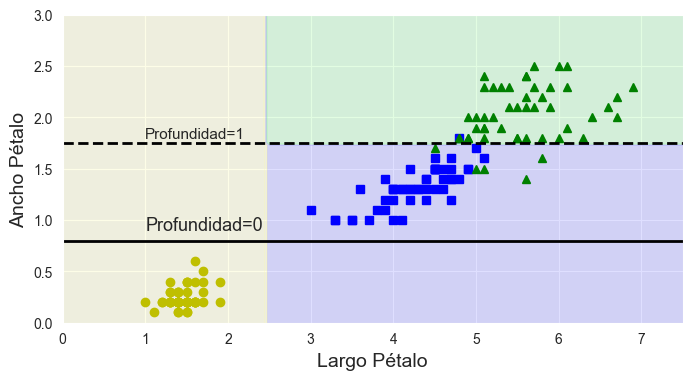

In [53]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data[:, 2:] # longitud y anchura de pétalos
y = iris.target
arbol_regularizado = DecisionTreeClassifier(max_depth=2, random_state=semilla)
arbol_regularizado.fit(X, y)
plt.figure(figsize=(8, 4))
plot_fronteras_decision(arbol_regularizado, X, y, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Profundidad=0", fontsize=13)
plt.text(1.0, 1.80, "Profundidad=1", fontsize=11)

### EJEMPLO 33:  Restringir el árbol de decisión con el hiperparámetro min_samples_split.


Text(0, 0.5, '')

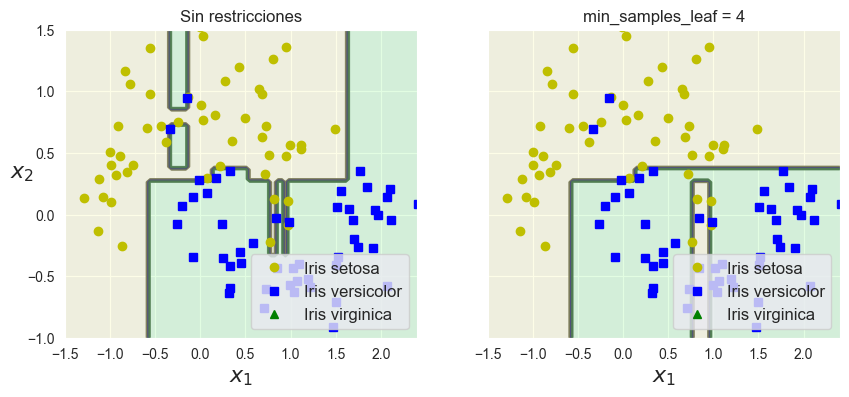

In [55]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=semilla)
arbol_1 = DecisionTreeClassifier(random_state=semilla)
arbol_2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=semilla)
arbol_1.fit(Xm, ym)
arbol_2.fit(Xm, ym)
fig, ejes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(ejes[0])
plot_fronteras_decision(arbol_1, Xm, ym, ejes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("Sin restricciones", fontsize=12)
plt.sca(ejes[1])
plot_fronteras_decision(arbol_2, Xm, ym, ejes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(arbol_2.min_samples_leaf), fontsize=12)
plt.ylabel("")

### EJEMPLO 34:  Entrenar un árbol de decisión CART para regresión con máxima profundidad de 2 sobre un dataset que generamos nosotros mismos para ver que tal lo hace

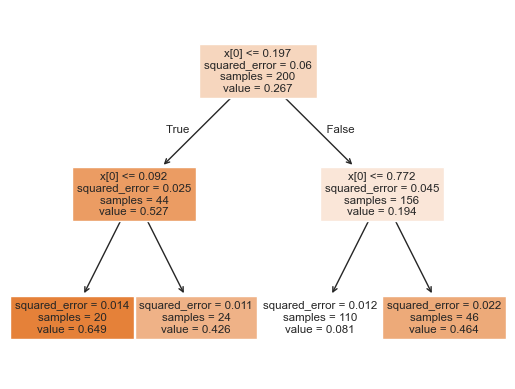

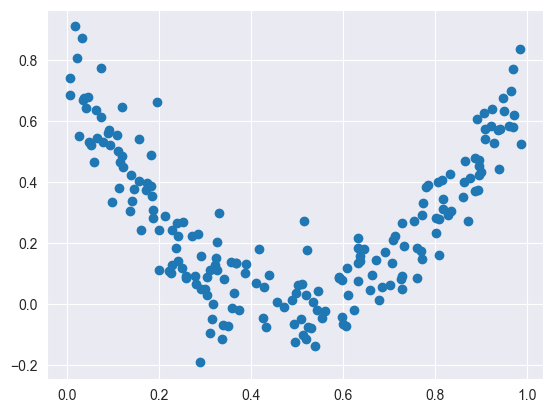

In [56]:
import numpy as np
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 3 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10
from sklearn import tree
# Datos cuadráticos + ruido aleatorio
# Entrenar modelo
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
arbol_reg = DecisionTreeRegressor(max_depth=2, random_state=semilla)
arbol_reg.fit(X, y)
tree.plot_tree(arbol_reg, filled=True)
# Dibujar datos y modelo
plt.show()
plt.scatter(X,y)

### EJEMPLO 35:  Código que genera la figura 38, entrenando un árbol de decisión sin restricciones y regularizado limitando la cantidad de mínima de ejemplos por nodo

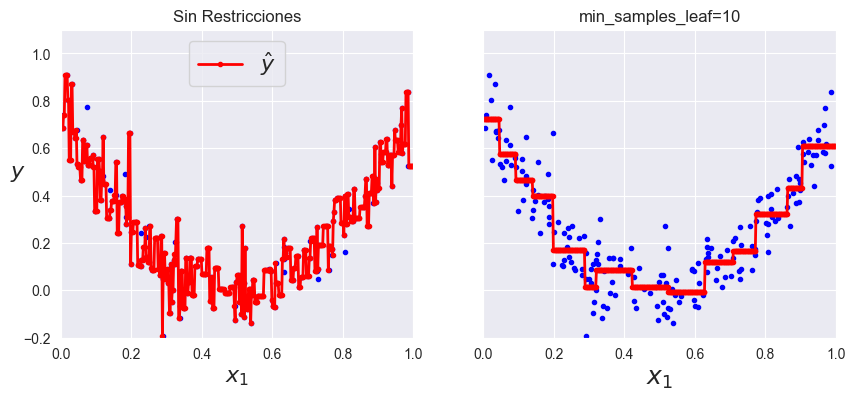

In [57]:
# Datos cuadráticos + ruido aleatorio
import numpy as np
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 3 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
arbol_r1 = DecisionTreeRegressor(random_state=semilla)
arbol_r2 = DecisionTreeRegressor(random_state=semilla, min_samples_leaf=10)
arbol_r1.fit(X, y)
arbol_r2.fit(X, y)
x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = arbol_r1.predict(x1)
y_pred2 = arbol_r2.predict(x1)
fig, ejes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(ejes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("Sin Restricciones", fontsize=12)
plt.sca(ejes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(arbol_r2.min_samples_leaf), fontsize=12)
plt.show()

### EJEMPLO 36 Implementar un sistema Voting con un Árbol de Decisión, Regresión Logística, KNN y Bosque Aleatorio:

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.25, random_state=semilla)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=semilla)
#------------ modelo HARD-VOTING ---------
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
arbol_cla = DecisionTreeClassifier()
bosque_cla = RandomForestClassifier()
relog_cla = LogisticRegression()
knn_cla = KNeighborsClassifier()
voting_cla = VotingClassifier(
             estimators=[('rnd', bosque_cla), ('dt',  arbol_cla), ('knn', knn_cla),
                         ('log', relog_cla)],
                             voting='hard', n_jobs=-1)
#--------- Medir eficiencia individual y agredada ---------
from sklearn.metrics import accuracy_score
for cla in (arbol_cla, bosque_cla, knn_cla, relog_cla, voting_cla):
    cla.fit(X_train, y_train)
    y_pred = cla.predict(X_test)
    print(cla.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.896
RandomForestClassifier 0.936
KNeighborsClassifier 0.936
LogisticRegression 0.84
VotingClassifier 0.936


### EJEMPLO 37: Implementar un sistema Soft-Voting:


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.25, random_state=semilla)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=semilla)
#-------------- modelo SOFT-VOTING ---------
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
relog_cla = LogisticRegression(solver="lbfgs", random_state=semilla)
bosque_cla = RandomForestClassifier(n_estimators=100, random_state=semilla)
svm_cla = SVC(gamma="scale", probability=True, random_state=semilla)
voting_cla = VotingClassifier(
   estimators=[('lr', relog_cla), ('rf', bosque_cla), ('svc', svm_cla)],
   voting='soft')
#-------------- Medir eficiencia individual y agredada
from sklearn.model_selection import cross_val_score
for cla in (relog_cla, bosque_cla, svm_cla, voting_cla):
   resultado = cross_val_score(cla, X, y, scoring='accuracy', cv=10)
   print(cla.__class__.__name__, resultado.mean())

LogisticRegression 0.8560000000000001
RandomForestClassifier 0.9279999999999999
SVC 0.9259999999999999
VotingClassifier 0.9199999999999999


### EJEMPLO 38: Agregar 600 Árboles de Decisión, cada uno de ellos entrenados en 150 muestras de los datos usando un BaggingClassifier. En el caso de que queramos realizar Pasting, solo tendremos que poner el hiperparámetro bootstrap (que es un término estadístico que significa reemplazo) como False:

In [60]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.25, random_state=semilla)
# Un árbol aislado
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
resultado = cross_val_score(DecisionTreeClassifier(), X, y, scoring='accuracy', cv=10)
print("Árbol de decisión aislado: ", resultado.mean())
# Bootstrap
from sklearn.ensemble import BaggingClassifier
bag_cla = BaggingClassifier(DecisionTreeClassifier(), n_estimators=600,
                        max_samples=150, bootstrap=True, n_jobs=-1)
resultado = cross_val_score(bag_cla, X, y, scoring='accuracy', cv=10)
print("Bootstrap:", resultado.mean())

Árbol de decisión aislado:  0.9299999999999999
Bootstrap: 0.9339999999999999


### EJEMPLO 39: Añade este código al del ejemplo 38:

In [61]:
bag_cla2 = BaggingClassifier(DecisionTreeClassifier(), n_estimators=600,
                        max_samples=150, bootstrap=True, n_jobs=-1,
                        oob_score=True)
bag_cla2.fit(X, y)
print("Bootstrap out-of-bag: ", bag_cla2.oob_score_)

Bootstrap out-of-bag:  0.938


### EJEMPLO 40: Crear un modelo para ver cómo se comporta con los datos de Iris.


In [62]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
iris = load_iris()
X = iris.data
y = iris.target
bosque_cla = RandomForestClassifier(n_estimators=600, max_leaf_nodes=16, n_jobs=-1)
resultado = cross_val_score(bosque_cla, X, y, scoring='accuracy', cv=10)
print("Random Forest:", resultado.mean())

Random Forest: 0.96


### EJEMPLO 41: Añade al ejemplo 41 este código para acceder a la importancia de cada característica:


In [ ]:
bosque_cla.fit(iris["data"], iris["target"])
for nombre, score in zip(iris['feature_names'], bosque_cla.feature_importances_):
    print(nombre, score)
# Probar a usar solamente dos características importantes
X = iris.data[:, 2:] # ancho y longitud de Petalis
y = iris.target
bosque_cla = RandomForestClassifier(n_estimators=600, max_leaf_nodes=16, n_jobs=-1)
resultado = cross_val_score(bosque_cla, X, y, scoring='accuracy', cv=10)
print("Eliminando características: ", resultado.mean())

### EJEMPLO 42: Añade al ejemplo anterior.


C:\Users\ESP\Desktop\MachineLearning\saa\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


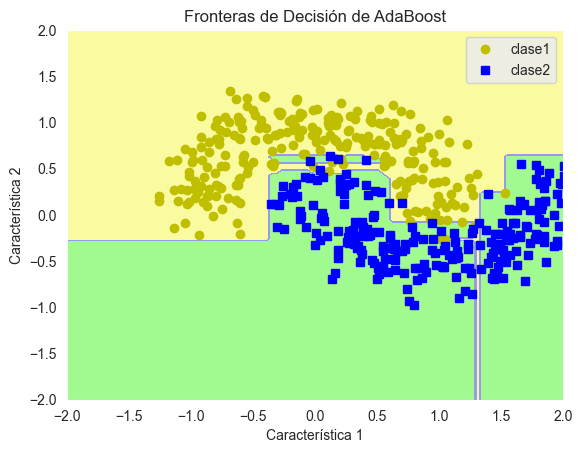

In [63]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise = 0.2, random_state=semilla)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_cla = AdaBoostClassifier(
             DecisionTreeClassifier(max_depth=2), n_estimators=200,
             algorithm='SAMME.R', learning_rate=0.5)
ada_cla.fit(X, y)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def plot_fronteras_decision(arbol, X, y, ejes=[-2, 2, -2, 2]):
       x1s = np.linspace(ejes[0], ejes[1], 100)
       x2s = np.linspace(ejes[2], ejes[3], 100)
       x1, x2 = np.meshgrid(x1s, x2s)
       X_nuevo = np.c_[x1.ravel(), x2.ravel()]
       y_pred = arbol.predict(X_nuevo).reshape(x1.shape)
       plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="clase1")
       plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="clase2")
       plt.axis(ejes)
       plt.contourf(x1, x2, y_pred, cmap=ListedColormap(['#fafaa0','#9898ef','#a0fa90']))
plot_fronteras_decision(ada_cla, X, y, ejes=[-2,2,-2,2])
plt.legend()
plt.title("Fronteras de Decisión de AdaBoost")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

### EJEMPLO 43: Vamos a usar GradientBoostingClassifier.


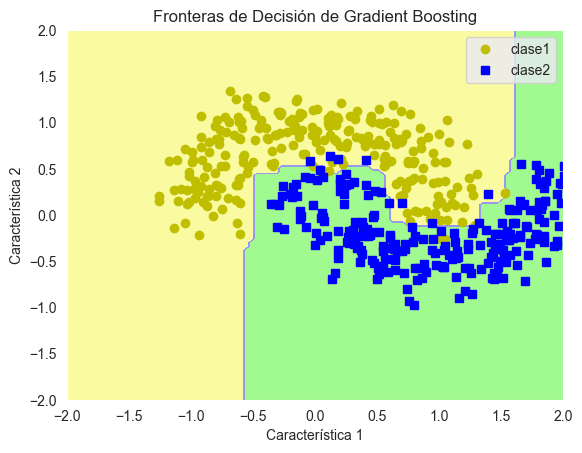

In [64]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise = 0.2, random_state=semilla)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=semilla)
from sklearn.ensemble import GradientBoostingClassifier
gb_cla = GradientBoostingClassifier(max_depth=3, n_estimators=100, learning_rate=0.5)
gb_cla.fit(X_train, y_train)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def plot_fronteras_decision(arbol, X, y, ejes=[-2, 2, -2, 2]):
       x1s = np.linspace(ejes[0], ejes[1], 100)
       x2s = np.linspace(ejes[2], ejes[3], 100)
       x1, x2 = np.meshgrid(x1s, x2s)
       X_nuevo = np.c_[x1.ravel(), x2.ravel()]
       y_pred = arbol.predict(X_nuevo).reshape(x1.shape)
       plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="clase1")
       plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="clase2")
       plt.axis(ejes)
       plt.contourf(x1, x2, y_pred, cmap=ListedColormap(['#fafaa0','#9898ef','#a0fa90']))
plot_fronteras_decision(gb_cla, X, y, ejes=[-2,2,-2,2])
plt.legend()
plt.title("Fronteras de Decisión de Gradient Boosting")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

### EJEMPLO 44: Vamos a usar GradientBoostingClassifier.


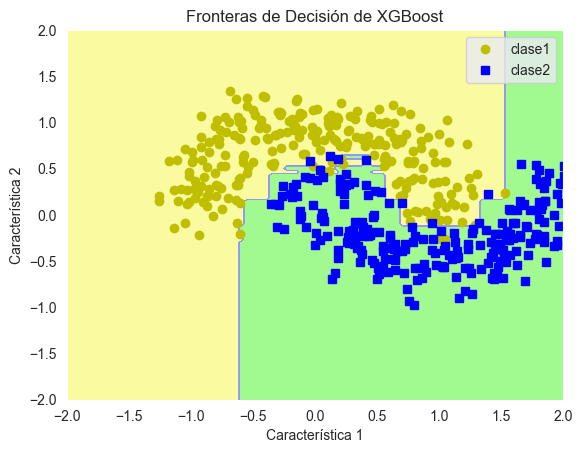

In [66]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise = 0.2, random_state=semilla)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=semilla)
from xgboost.sklearn import XGBClassifier
xgb_cla = XGBClassifier()
xgb_cla.fit(X_train, y_train)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Quizás debas instalar: pip install xgboost
def plot_fronteras_decision(arbol, X, y, ejes=[-2, 2, -2, 2]):
       x1s = np.linspace(ejes[0], ejes[1], 100)
       x2s = np.linspace(ejes[2], ejes[3], 100)
       x1, x2 = np.meshgrid(x1s, x2s)
       X_nuevo = np.c_[x1.ravel(), x2.ravel()]
       y_pred = arbol.predict(X_nuevo).reshape(x1.shape)
       plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="clase1")
       plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="clase2")
       plt.axis(ejes)
       plt.contourf(x1, x2, y_pred, cmap=ListedColormap(['#fafaa0','#9898ef','#a0fa90']))
plot_fronteras_decision(xgb_cla, X, y, ejes=[-2,2,-2,2])
plt.legend()
plt.title("Fronteras de Decisión de XGBoost")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

### EJEMPLO 45: configurar un modelo HMM conociendo las probabiliades iniciales, 3 estados,


In [68]:
import numpy as np
from hmmlearn import hmm

np.random.seed(449)

modelo = hmm.GaussianHMM(n_components=3, covariance_type="full")
modelo.startprob_ = np.array([0.6, 0.3, 0.1])
modelo.transmat_ = np.array([[0.7, 0.2, 0.1],
                             [0.3, 0.5, 0.2],
                             [0.3, 0.3, 0.4]])
modelo.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
modelo.covars_ = np.tile(np.identity(2), (3, 1, 1))

_, Z = modelo.sample(n_samples=5)
X, _ = modelo.sample(n_samples=5, currstate=Z[-1])
print(X)
print(Z)

[[ 2.56616456 -3.44424567]
 [ 4.08719483 11.70067541]
 [ 3.97405742  9.73355935]
 [-2.14387644 -0.03807413]
 [-0.08584729 -0.8157823 ]]
[0 0 0 0 1]


### EJEMPLO 46: Crear el ejemplo del HMM del examen del perro en Python. Programar los algoritmos Forward y Viterbi es complejo, así que usaremos un módulo que ya los tiene hechos y que se llama hmmlearn.



In [69]:
from hmmlearn import hmm
import numpy as np
## Parte 1. Generar un modelo HMM definiendo parámetros
print("====== Configurando modelo HMM")
print("  ini_param inicializan el modelo")
print("  s         semilla de probabilidad")
print("  t         probabilidades de transición")
print("  e         probabilidades de emisión")
modelo = hmm.CategoricalHMM(n_components=2, random_state=semilla, init_params='ste')
# probabilidades iniciales
# probabilidad de iniciar con el estado Tired = 0
# probabilidad de iniciar con el estado Happy = 1
distribucion_inicial = np.array([0.1, 0.9])
modelo.startprob_ = distribucion_inicial
print("-- Paso 2. Definir Matriz de Transisión")
# Las probabilidades de transmisión son
#       tired happy
# tired   0.4   0.6
# happy   0.2   0.8
distribucion_transmision = np.array([[0.4, 0.6], [0.2, 0.8]])
modelo.transmat_ = distribucion_transmision
print("-- Paso 3. Definir Matriz de Probabilidades de Observación")
# probabilidades_observacion
#        Fail    OK   Perfect
# tired   0.3   0.5       0.2
# happy   0.1   0.5       0.4
matriz_observacion = np.array([[0.3, 0.5, 0.2], [0.1, 0.5, 0.4]])
modelo.emissionprob_ = matriz_observacion
print("-- Paso 4. Muestras simuladas")
intentos, estados_simulados = modelo.sample(100000)
# Una muestra de los intentos simulados
# 0 -> Fail
# 1 -> OK
# 2 -> Perfect
print("\nMuestra de ejemplo de los intentos simulados")
print(intentos[:10])
print("====== PARTE 2 - Decodificar la secuencia de estados ocultos")
## A una secuencia OK - Fail - Perfect
X_train = intentos[:intentos.shape[0] // 2]
X_test = intentos[intentos.shape[0] // 2:]
modelo.fit(X_train)
exam_observations = [[1, 0, 2]]
estados_predichos = modelo.predict(X=[[1, 0, 2]])
print("Predicciones de estados que generan OK, Fail, Perfect: \n 0 -> Tired , "
"1 -> Happy")
print(estados_predichos)

====== Configurando modelo HMM
  ini_param inicializan el modelo
  s         semilla de probabilidad
  t         probabilidades de transición
  e         probabilidades de emisión
-- Paso 2. Definir Matriz de Transisión
-- Paso 3. Definir Matriz de Probabilidades de Observación
-- Paso 4. Muestras simuladas


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'emissionprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'e'



Muestra de ejemplo de los intentos simulados
[[2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [0]
 [0]
 [2]]
====== PARTE 2 - Decodificar la secuencia de estados ocultos
Predicciones de estados que generan OK, Fail, Perfect: 
 0 -> Tired , 1 -> Happy
[1 0 1]
